In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [34]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 

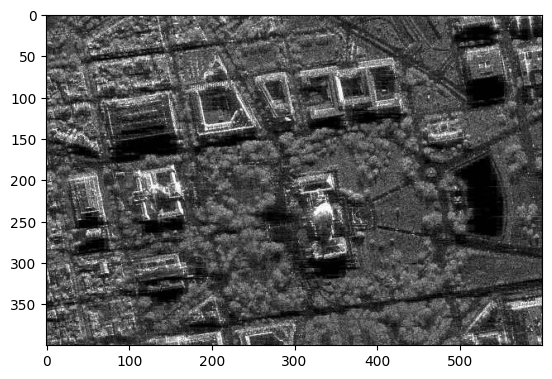

In [35]:
image = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

2. постройте гистограмму

Text(0.5, 1.0, 'Гистограмма яркостей')

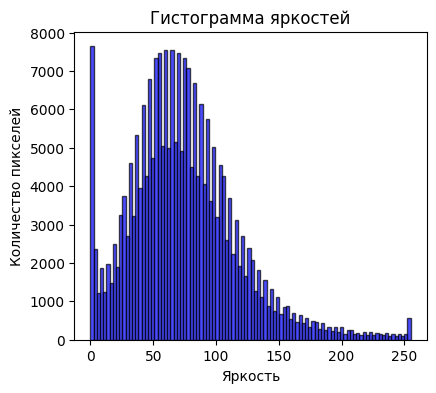

In [ ]:
pixels = image.flatten()
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(pixels, bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Яркость')
plt.ylabel('Количество пикселей')
plt.title('Гистограмма яркостей')
plt.grid(True, alpha=0.3)

3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

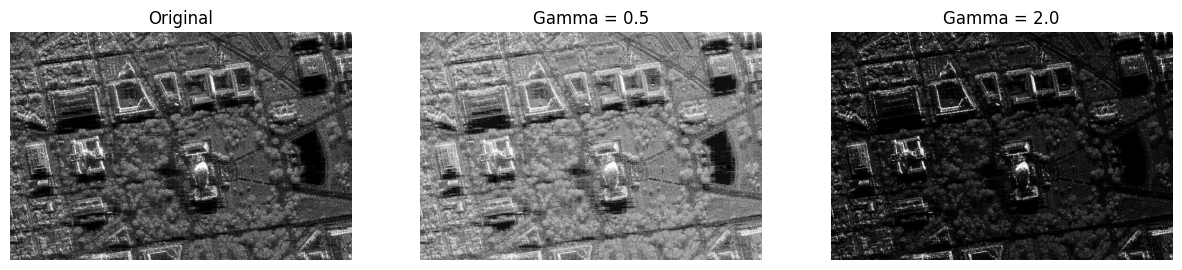

In [37]:
def gamma_corr(image, gamma):
    normal = image.astype(np.float32) / 255
    correct = np.power(normal, gamma)
    res = (correct * 255).astype(np.uint8)
    return res

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gamma_light = 0.5
gamma_dark = 2.0
image_light = gamma_corr(image, gamma_light)
image_dark = gamma_corr(image, gamma_dark)
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(image_light, cmap='gray')
axes[1].set_title(f'Gamma = {gamma_light}')
axes[1].axis('off')

axes[2].imshow(image_dark, cmap='gray')
axes[2].set_title(f'Gamma = {gamma_dark}')
axes[2].axis('off')

4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

Orig vs img_gamma < 1
	SSIM: 0.7827911454496798
	MSE: 3250.429145833333
Orig vs img_gamma > 1
	SSIM: 0.5084117871483151
	MSE: 2383.7636375


(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

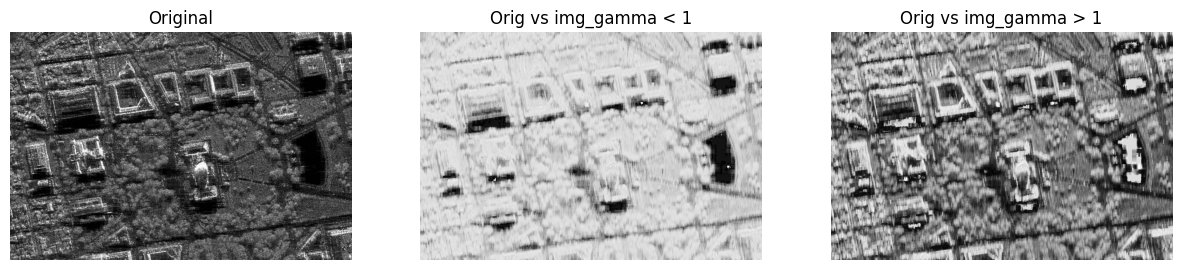

In [38]:
from skimage.metrics import structural_similarity, mean_squared_error

fig, axes = plt.subplots(1, 3, figsize=(15, 5))



(ssim, diff) = structural_similarity(image, image_light, 
                                 full=True, 
                                 multichannel=True, 
                                 channel_axis=-1)
                                 
diff_light = (diff * 255).astype("uint8")
print("Orig vs img_gamma < 1")
print("\tSSIM: {}".format(ssim))
mse = mean_squared_error(image, image_light)
print("\tMSE: {}".format(mse))



(ssim, diff) = structural_similarity(image, image_dark, 
                                 full=True, 
                                 multichannel=True, 
                                 channel_axis=-1)
diff_dark = (diff * 255).astype("uint8")
print("Orig vs img_gamma > 1")
print("\tSSIM: {}".format(ssim))
mse = mean_squared_error(image, image_dark)
print("\tMSE: {}".format(mse))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(diff_light, cmap='gray')
axes[1].set_title(f'Orig vs img_gamma < 1')
axes[1].axis('off')

axes[2].imshow(diff_dark, cmap='gray')
axes[2].set_title(f'Orig vs img_gamma > 1')
axes[2].axis('off')



5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

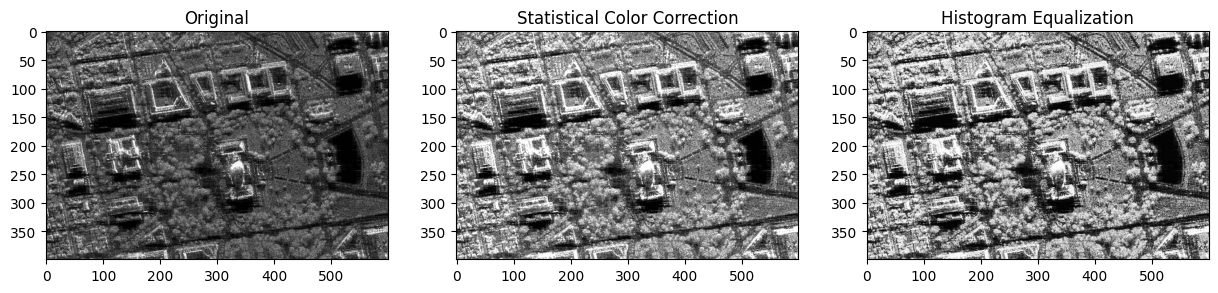

Equalization gray vs Statistical Color Correction
	SSIM: 0.9500070636130857
	MSE: 247.70102083333333


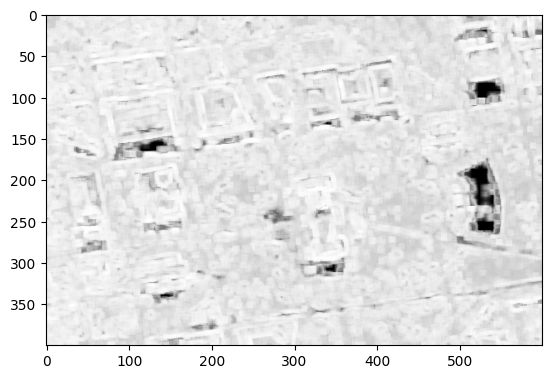

In [39]:
def static_color_correction(source, refer):
    mean_src = source.mean()
    std_src = source.std()

    mean_ref = refer.mean()
    std_ref = refer.std()

    image_corr = (source - mean_src) * (std_ref / std_src) + mean_ref
    return np.clip(image_corr, 0, 255).astype(np.uint8)


eq_gray = cv2.equalizeHist(image)
image_corr = static_color_correction(image, eq_gray)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(image_corr, cmap='gray')
axs[1].set_title('Statistical Color Correction')

axs[2].imshow(eq_gray, cmap='gray')
axs[2].set_title('Histogram Equalization')

plt.show()

(ssim, diff) = structural_similarity(image_corr, eq_gray, full=True)
diff = (diff * 255).astype("uint8")
print("Equalization gray vs Statistical Color Correction")
print(f"\tSSIM: {ssim}")
print(f"\tMSE: {mean_squared_error(image_corr, eq_gray)}")

plt.imshow(diff, cmap="gray")

6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

C:\Users\Otche\AppData\Local\Temp\ipykernel_3092\263463077.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


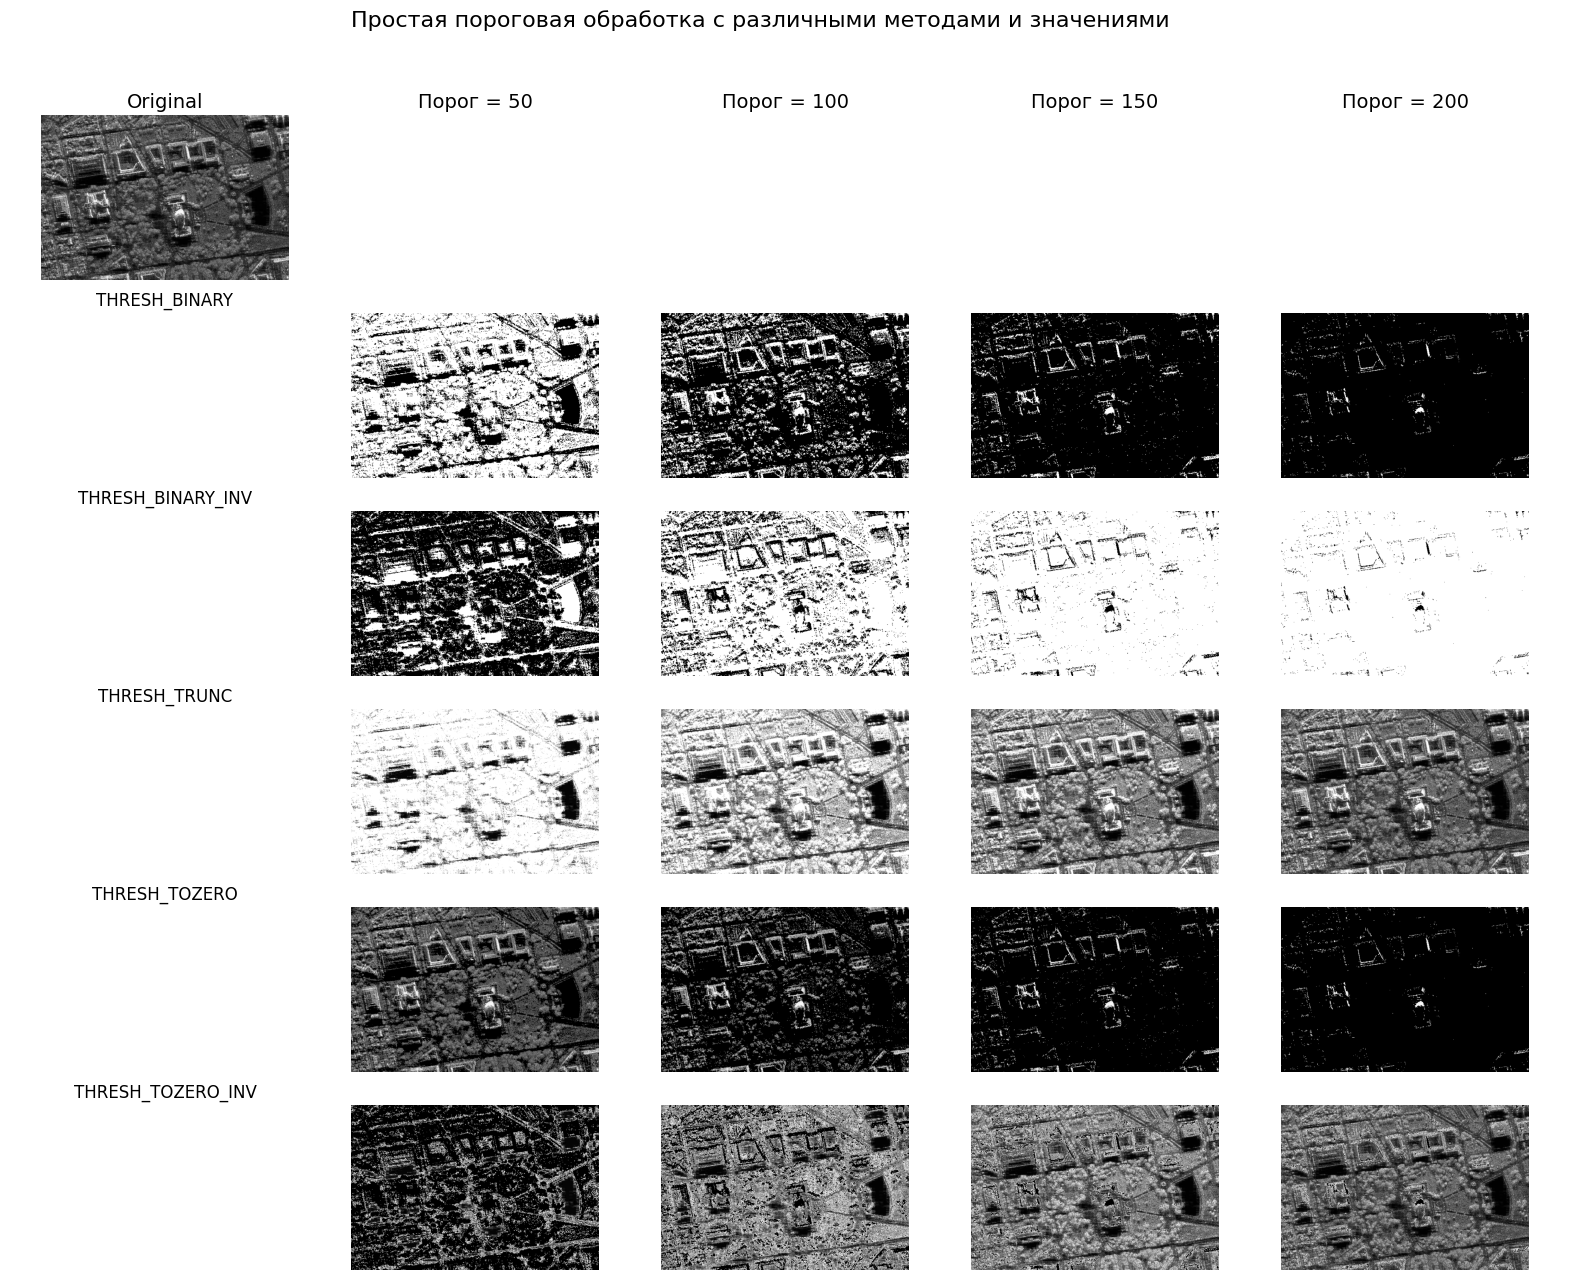

In [40]:
threshold_values = [50, 100, 150, 200]

methods = [
    ('THRESH_BINARY', cv2.THRESH_BINARY),
    ('THRESH_BINARY_INV', cv2.THRESH_BINARY_INV),
    ('THRESH_TRUNC', cv2.THRESH_TRUNC),
    ('THRESH_TOZERO', cv2.THRESH_TOZERO),
    ('THRESH_TOZERO_INV', cv2.THRESH_TOZERO_INV)
]

fig, axes = plt.subplots(len(methods) + 1, len(threshold_values) + 1, 
                         figsize=(20, 15),
                         gridspec_kw={'wspace': 0, 'hspace': 0.2})

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original', fontsize=14, pad=5)
axes[0, 0].axis('off')

for col, thresh_val in enumerate(threshold_values):
    axes[0, col+1].set_title(f'Порог = {thresh_val}', fontsize=14, pad=5)
    axes[0, col+1].axis('off')


for row, (method_name, method_type) in enumerate(methods, 1):
    
    axes[row, 0].set_title(method_name, fontsize=12, pad=5)
    axes[row, 0].axis('off')
    
    for col, thresh_val in enumerate(threshold_values):
        
        _, result = cv2.threshold(image, thresh_val, 255, method_type)
        
        
        axes[row, col+1].imshow(result, cmap='gray')
        axes[row, col+1].axis('off')

plt.suptitle('Простая пороговая обработка с различными методами и значениями', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()